In [3]:
import batman
import numpy as np
import matplotlib.pyplot as plt

A renewal of values from example_2.ipynb as fixing the orbital period and changing the semi-major axis may give unphysical orbital speeds

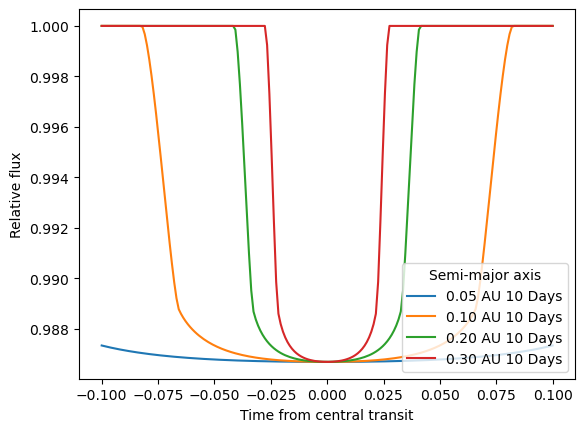

In [5]:
R_star = 1 #R_sun
R_planet = 1.1 #R_J
semi_major_axis = 10 #AU

semi_major_axis = [0.05, 0.1, 0.2, 0.3] # AU  
#.. Chapter 4, p130. Semi-major axis range for transit detection + http://exoplanets.org/
periods = [10, 10, 10, 10] # Days

#Quick start example
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
# params.per = 5                  #orbital period
params.rp = R_planet * 0.10045 #R_Sun       #planet radius (in units of stellar radii)
# params.a = 15                        #semi-major axis (in units of stellar radii)
params.inc = 90.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

t = np.linspace(-0.1, 0.1, 200)

array = np.divide(np.multiply(semi_major_axis, 215.032), R_star) #Convert to Stellar radii

for params.a, a_au, params.per in zip(array, semi_major_axis, periods):
    m = batman.TransitModel(params, t)    #initializes model
    flux_initial = m.light_curve(params)          #calculates light curve
    plt.plot(t, flux_initial, label = "{:.2f} AU {:.1f} Days".format(a_au, params.per))
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.legend(title="Semi-major axis", loc='lower right')
plt.show()

#Transit duration
#T_{dur} = \frac{P R}{\pi a}
#Assuming P (period) and R (star radius) is constant, transit duration follows this relation,
#T_{dur} ~ \frac{1}{a}